#Galaxy Mergers

To see each passage and additional question individually, visit these:

* [Direct](https://dirac1.calpoly.edu/user/bavedisi/notebooks/nfshome/bavedisi/phys202/phys202-project/Project/Direct.ipynb)

* [Retrograde](https://dirac1.calpoly.edu/user/bavedisi/notebooks/nfshome/bavedisi/phys202/phys202-project/Project/Retrograde.ipynb)

* [S5 Direct](https://dirac1.calpoly.edu/user/bavedisi/notebooks/nfshome/bavedisi/phys202/phys202-project/Project/S5%20Direct.ipynb)

* [S5 Retrograde](https://dirac1.calpoly.edu/user/bavedisi/notebooks/nfshome/bavedisi/phys202/phys202-project/Project/S5%20Retrograde.ipynb)

* [S7 Direct](https://dirac1.calpoly.edu/user/bavedisi/notebooks/nfshome/bavedisi/phys202/phys202-project/Project/S7%20Direct.ipynb)

* [S7 Retrograde](https://dirac1.calpoly.edu/user/bavedisi/notebooks/nfshome/bavedisi/phys202/phys202-project/Project/S7%20Retrograde.ipynb)

##Abstract

This project is a modelling of two galaxies interacting with each other. One galaxy will be in the rest frame and the other galaxy will be moving with respect to the first galaxy. The main galaxy will have 120 orbiting stars in shells within 20%, 30%, 40%, 50%, and 60% of the minimum radius of $25 \: kpc$. As the disrupting galaxy moves towards the main galaxy, the interactions between the stars and the galaxies will deform their orbits. To solve these problems, I have taken the route of using the odeint method to calculate the numerical integrations instead of the Runge-Kutta method described in the paper by Toomre and Toomre. The base questions completed are the direct and retrograde passages. And for the additional questions, I explored the S5 and S7 initial conditions in both the direct and retrograde case.

##Base Question
My base question implimentation took quite some time to get right. The `derivs` function is essentially the same as the ones we've done in class as homework, with the differentials broken into two components. Since the initial conditions of the two base cases I tested will simply be the opposite motion of each other, solving the problem for both wasn't too hard. The transition between direct and retrograde passages only needs to change the direction the stars are moving (as in the velocities).


##Additional Questions
The S5 initial condition case asks to have the $X$ position to be at $25 \: kpc$, the $Y$ position and $X$ velocity to be zero, and the $Y$ velocity to be greater than zero at the minimum of the parabola. The implimentation of these cases were fairly simple. I only needed to change the $y$-position and velocity of the galaxy $S$. The same was done for the S7 initial condition case, but in the $y$ frame.

####Note: Paths to text files with the relevent code will be hyperlinked in the narrative.

#Derivative Function

###Equations of motion:

$$ \mathbf{\ddot r} = - \gamma \left\{\frac{M}{r^3} \mathbf{r} - \frac{S}{\rho^3} \boldsymbol{\rho} + \frac{S}{R^3} \boldsymbol\Re \right\} $$

$$ \ddot{\boldsymbol\Re} = - \gamma \frac{M+S}{R^3} \boldsymbol\Re $$

* $\gamma = 4.4983169634398597*10^{4} \frac{kpc^3}{bil\: years^2}$ is the converted gravitational constant which has been multiplied by $10^{11} M_\odot$ where $M_\odot = 1.98855*10^{30}$, is the mass of one sun.
* $M$ is the central mass of the main galaxy and $S$ is the central mass of the disrupting galaxy
* $\mathbf{r}$ is the radius vector from mass $M$ to massless point particle $m$, representing a single (massless) star in the outer disk of the main galaxy.
* $\boldsymbol\Re$ is the radius vector from $M$ to $S$
* $\boldsymbol{\rho} = \boldsymbol{\Re} - \boldsymbol{r}$

These will be the equations of motion the [Derivative Function](https://dirac1.calpoly.edu/user/bavedisi/edit/nfshome/bavedisi/phys202/phys202-project/Project/derivsfunc.py) solves. It takes in an array with eight indices, four position and four velocity arguments. The equations are setup in component form to ensure ease of use and facilitate later modifications of code.

#Creating the Initial Conditions

The two velocity equations up below describe the total velocity of both components.

These two functions, located [here](https://dirac1.calpoly.edu/user/bavedisi/edit/nfshome/bavedisi/phys202/phys202-project/Project/initialconditions.py), as well as the position initial conditions, will create the starting positions and velocites of each star in orbit of $M$ in both the direct and retrograde motions. The way the positions are arranged in the orbit are 12, 18, 24, 30, and 36 stars in shells 20%, 30%, 40%, 50%, and 60% percent, respectively, of a minimum radius $R_{min} = 25 \: kpc$.

To combine the initial conditions of both directions of motion, `np.transpose`, `np.hstack`, and `np.vstack` had to be used to create vectors of the position and velocity components for each star. The function does look ugly, but it also does the job it's asked to do fairly well and quickly.

##Circular Position

The two main components of the star's positions are `cos` and `sin`.

$$ x = r\cos(\theta) $$

$$ y = r\sin(\theta) $$

$\theta$ in these two equations vary depending on the shell of orbit since each shell has a different number of stars.

##Parabolic Position

Since the parabolic motion of the galaxy $S$ is derived from the horizontally oriented parabola equation, I used this

$$ x = 25 - \frac{y^2}{100} $$

This equation creates the initial conditions for the parabolic trajectory of the disrupting galaxy $S$. It comes to a value of $25 \: kpc$ at the minimum/apex of its parabolic path.

## Orbital velocities

###Circular Velocity

$$ v = \sqrt{\frac{\gamma M}{r}} $$

* $\gamma$ is the gravitational constant as defined above
* $M$ is the mass of the main galaxy
* $r$ is the distance between the bodies

###Parabolic Velocity

$$ v = \sqrt{\frac{2\gamma(M+S)}{R}} $$ 

* $\gamma$ is the gravitational constant as defined above
* $M$ is the central mass of the main galaxy
* $S$ is the central mass of the disrupting galaxy
* $R$ is the distance between the galaxies

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import timeit
from scipy.integrate import odeint
from IPython.html.widgets import interact, fixed
from moviepy.video.io.bindings import mplfig_to_npimage
import moviepy.editor as mpy;

:0: FutureWarning: IPython widgets are experimental and may change in the future.
  warn(skimage_deprecation('The `skimage.filter` module has been renamed '



####Constants that need to be defined

When using the interactive plot down below, one can comment out which plot they don't want to interact with.

In [2]:
gamma = 4.4983169634398597e4
tsteps = 1000
t = np.linspace(0,1.5,tsteps)
M = 10
S = 10
whichplot='direct'
# whichplot='retro'

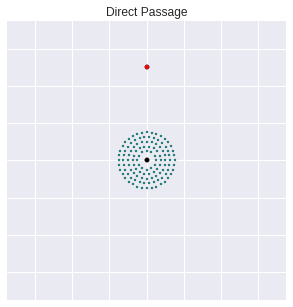

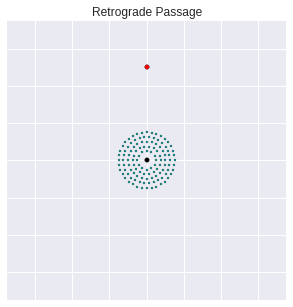

In [3]:
from initialconditions import *
from derivsfunc import derivs
from solutions import ode_solutions
from plotter import plot_ode
from staticplotter import plot_static
from directmoviemaker import *
from retromoviemaker import *
# I do not know how to stop these two from being outputted every time I run 
# the movie maker functions

In [4]:
direct_ic_total, retro_ic_total, icR, direct_star_ic, retro_star_ic = ics(M,S,gamma)
assert direct_ic_total.shape == (484,)

#Solutions

Since the solution function doesn't need much explanation, here is the [code](https://dirac1.calpoly.edu/user/bavedisi/edit/nfshome/bavedisi/phys202/phys202-project/Project/solutions.py). It uses the `odeint` function inside of a loop to calculate the solution for each star at all times. Once the solution has been computed, each component necessary for plotting is sliced into a list. The reason why I only return the first index of $S$'s position and velocity is due to the fact that throughout the 120 stars, the values of `R1` and `R2` don't change much.

In [5]:
direct_r1, direct_r2, retro_r1, retro_r2, R1, R2 = ode_solutions(t,tsteps,M,S,gamma)

In [6]:
assert len(direct_r1) == 120
assert len(direct_r2) == 120
assert len(retro_r1) == 120
assert len(retro_r2) == 120
assert direct_r1[0].shape == (1000,)

#Plotting the Function

Since my solution lists/arrays are setup with shape (120,1000), I have to loop through each star, at a time set by the user with the interactive slider, and plot it. Also, if the user wanted to see either the direct or retrograde passage, all they need to do is indicate which passage by setting `whichplot` equal to either `'direct'` or `'retro'`. The whole process takes a few seconds to plot the positions at the time specified.

Code: [Plotter](https://dirac1.calpoly.edu/user/bavedisi/edit/nfshome/bavedisi/phys202/phys202-project/Project/plotter.py)

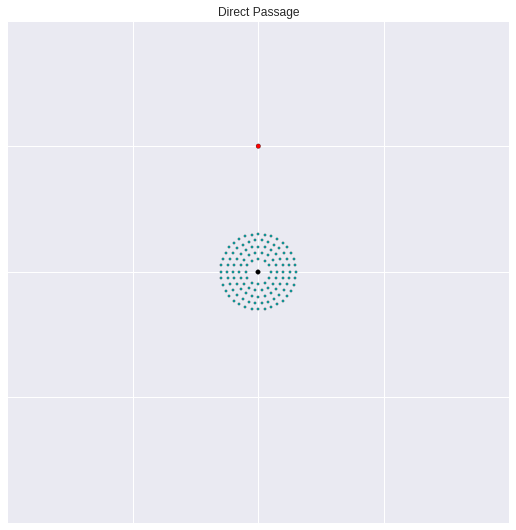

In [7]:
interact(plot_ode, n=(0,len(t)-1), direct_r1=fixed(direct_r1), direct_r2=fixed(direct_r2), retro_r1=fixed(retro_r1), retro_r2=fixed(retro_r2), R1=fixed(R1), R2=fixed(R2), whichplot=fixed(whichplot));

# A static visualization of the two passages

Since going through all 1000 points in the simulation would take quite some time, this function takes the first 10 times of intervals of 50 and plots them. Since the disrupting galaxy $S$ leaves the frame around `t=350`, I only went up to `t=450` since the stars mainly just hang around after it leaves. This function uses subplots that are recursively plotted as the for loop goes through the times indicated by the list `o`. I am fairly proud of thinking of using a for loop to plot the subplots.

Code: [Static Plotter](https://dirac1.calpoly.edu/user/bavedisi/edit/nfshome/bavedisi/phys202/phys202-project/Project/staticplotter.py)

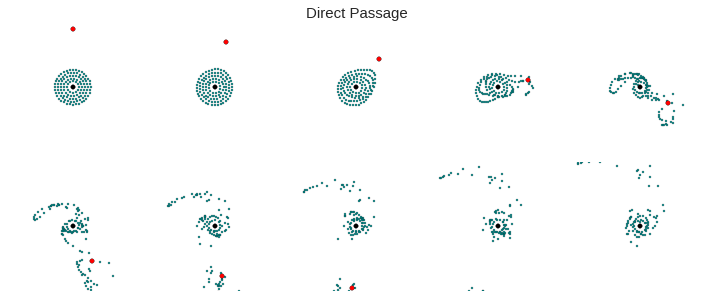

In [8]:
plot_static(t, 'direct', tsteps, M, S, gamma)

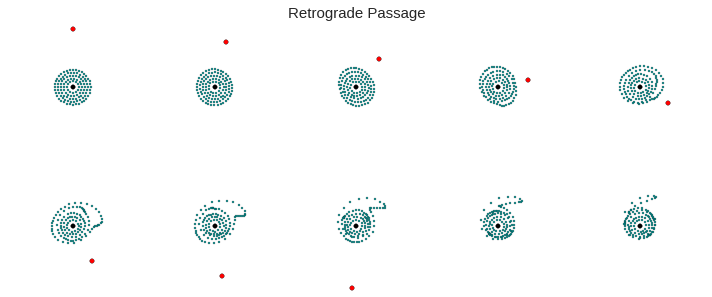

In [9]:
plot_static(t, 'retro', tsteps, M, S, gamma)

#Movies of each Passage

In order to see the two visualizations in a smoother form, I used the MoviePy extension, provided by Dr. Granger, to animate the motions. The specifics of how this works are still a little fuzzy, but the first part of the cell sets the intial positions of each component in the plot. Then the function updates the frame with new positions `t*20` to make the 1000 points more smooth.

To see the code for the movies go to:

[Direct](https://dirac1.calpoly.edu/user/bavedisi/edit/nfshome/bavedisi/phys202/phys202-project/Project/directmoviemaker.py)

[Retrograde](https://dirac1.calpoly.edu/user/bavedisi/edit/nfshome/bavedisi/phys202/phys202-project/Project/retromoviemaker.py)

In [8]:
direct_animation.ipython_display(fps=60)

In [12]:
retro_animation.ipython_display(fps=60)